In [1]:
## import the required Library 

import numpy as np                  # to hendle numpy array
import pandas as pd                 # to handle dataframe
import matplotlib.pyplot as plt     # to use in data visualizetion
import seaborn as sns               # to use in data visualizetion
from sklearn.model_selection import train_test_split # for evaluting ML alogithms
from sklearn.linear_model import LogisticRegression  # to estimate the relationship between a dependent variable and one or more independent veriables.
from sklearn.metrics import accuracy_score           # to measure the model performance
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Lode the data from csv file to Pandas DataFrame

titanic_df=pd.read_csv("titanic_train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## printing the first five row of dataframe.

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## printing the last five row of dataframe.

titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
## Check the number of rows and column.

titanic_df.shape

(891, 12)

In [63]:
# check the column's name:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
## getting some informetion aboout the data.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Check for the unique values in each column.
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# Chek for duplicate value.
titanic_df.duplicated(subset=['PassengerId']).any()

False

In [9]:
## check the missing values in each column.
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling the missing values:

<AxesSubplot:>

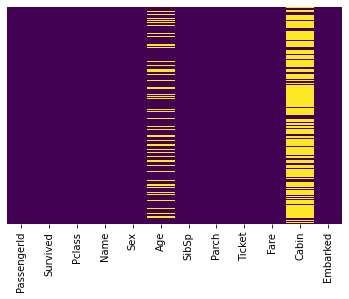

In [10]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# drope the "Cabin" column from the datafrom beacuse it has too many missing values.
titanic_df=titanic_df.drop(columns="Cabin",axis=1) # axis: 0 for row and 1 for column

In [12]:
# replacing the missing values of the "Age" column with mean value.
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True)

In [13]:
# finding the mode value of "Embarked" column for replacing missing value.
print(titanic_df["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [14]:
# replacing the missing values of the "Embarked" column with mode value.
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0],inplace=True)


In [15]:
# check the missing values again in each column.
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

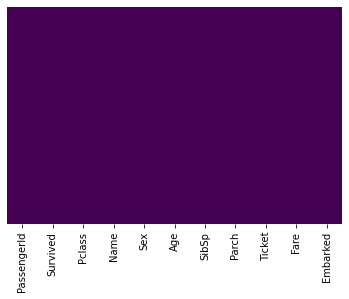

In [16]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# Finding nearest values to 300 mark
titanic_df['Fare'][titanic_df['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

In [18]:
# Replacing outliers with nearest possibe value
titanic_df['Fare'][titanic_df['Fare']>300] = 263.0

C:\Users\Prashant Pathak\AppData\Local\Temp\ipykernel_14244\3574317257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Fare'][titanic_df['Fare']>300] = 263.0


<AxesSubplot:xlabel='Age'>

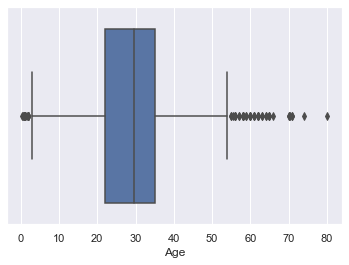

In [71]:
sns.boxplot(titanic_df['Age'])

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

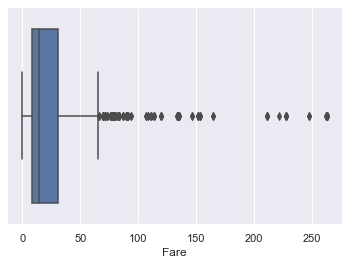

In [72]:
sns.boxplot(titanic_df['Fare'])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

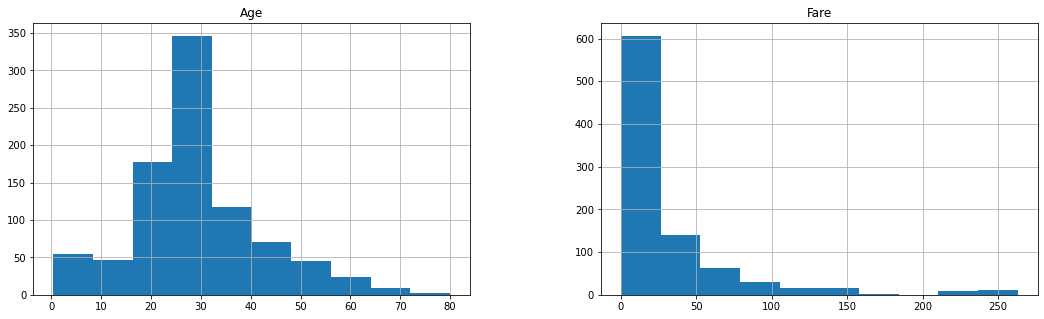

In [19]:
titanic_df.hist(['Age','Fare'], figsize=(18,5))

### Data Analysis:

In [20]:
# getting some statistical measurs about the data for analysis.
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,31.364716
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,43.257927
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


Note: "Age" and "Fare" are numerical columns and others are categorical columns so here is two columns are usefull for statistical measurs.

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


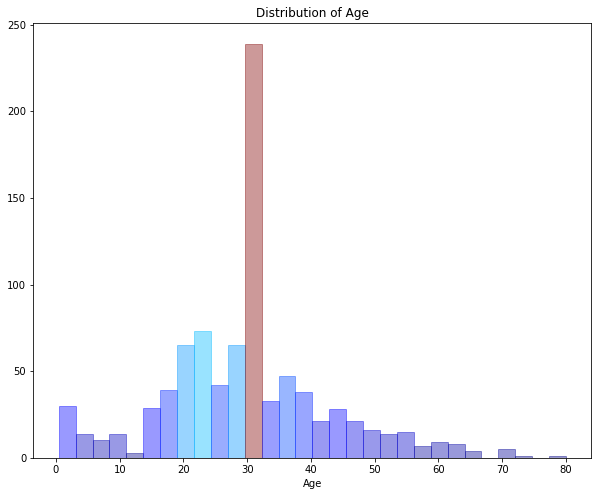

In [21]:
def hist(x,title):
    plt.figure(figsize = (10,8))
    ax = sns.distplot(x, 
                 kde=False);
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches, colors):
        rec.set_color(col)
    plt.title(title)
hist(titanic_df['Age'],'Distribution of Age')

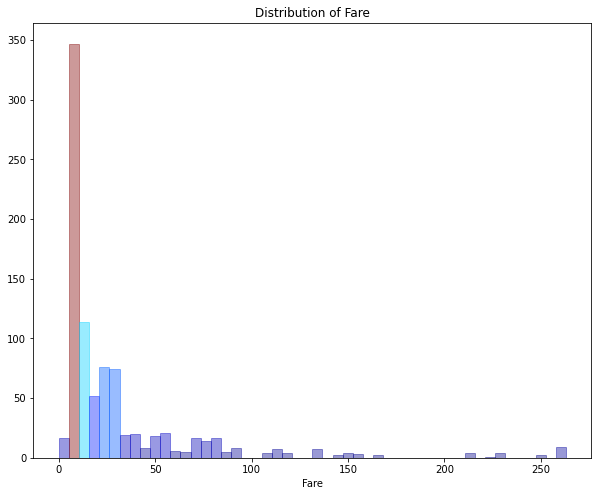

In [22]:
hist(titanic_df['Fare'],'Distribution of Fare')

In [23]:
# finding the number of people survived and not survived.(notSurvived=0, Survived=1)
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Note:- Survived=342 & Not survived=549, so not survived is more than survived people.

### Data Visualization:

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

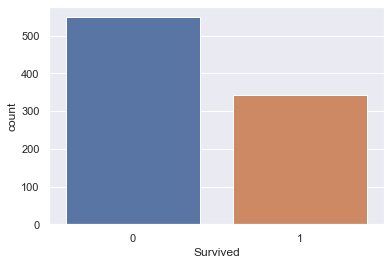

In [24]:
# Making countplot for "Survived" column.
sns.set()
sns.countplot('Survived',data=titanic_df,)

Note:- not survived>survived

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

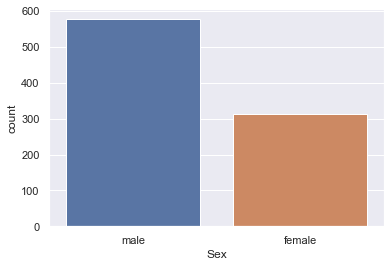

In [25]:
# Making countplot for "Sex" column.
sns.countplot('Sex',data=titanic_df)

Note:- male > Female

In [26]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

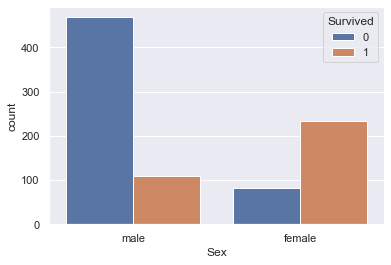

In [27]:
# Number of surviver based on gender.
sns.countplot('Sex',hue='Survived',data=titanic_df)


Note:- Survived male<Survived female

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

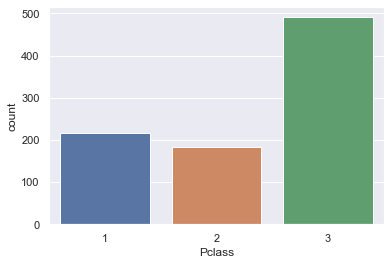

In [28]:
# Making countplot for "Pclass" column.
sns.countplot('Pclass',data=titanic_df)

Note:- 3rdClass>1stClass>2ndClass

In [29]:
titanic_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

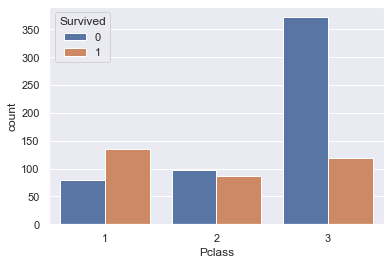

In [30]:
# Number of surviver based on Pclass.
sns.countplot('Pclass',hue='Survived',data=titanic_df)

Note:- Survived classwise(1st>3rd>2nd)

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

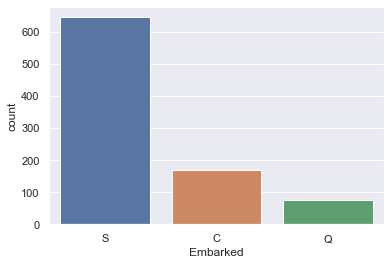

In [31]:
# Making countplot for "Embarkd" column.
sns.countplot('Embarked',data=titanic_df)

Note:- S>C>Q

In [32]:
titanic_df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

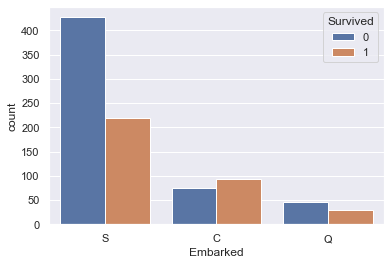

In [33]:
# Number of surviver based on Embarked .
sns.countplot('Embarked',hue='Survived',data=titanic_df)

Note:- Survived Embarked(S>C>Q), survived C>not survived C, survived S<not survived S,survived Q<not survived Q.

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

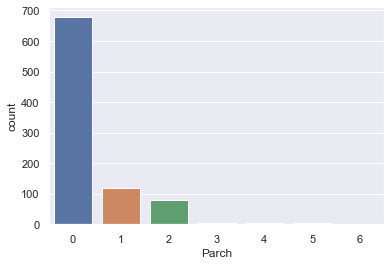

In [64]:
# Making countplot for "Parch" column.
sns.countplot('Parch',data=titanic_df)

In [65]:
titanic_df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

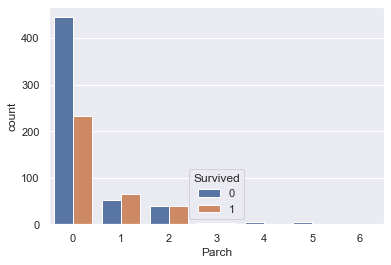

In [66]:
# Number of surviver based on Parch .
sns.countplot('Parch',hue='Survived',data=titanic_df)

C:\Users\Prashant Pathak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='count'>

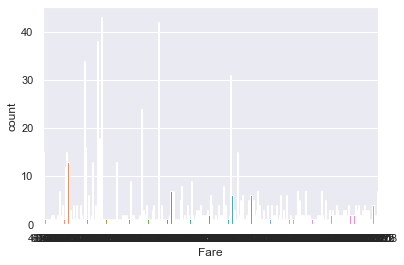

In [67]:
# Making countplot for "fare" column.
sns.countplot('Fare',data=titanic_df)

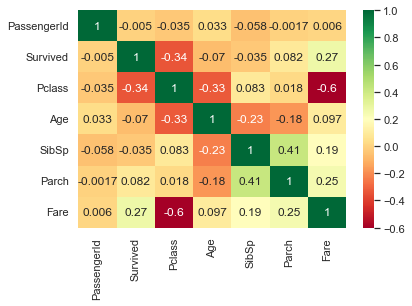

In [34]:
def titanic_corr(titanic_df):
    correlation = titanic_df.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(titanic_df)

### Encoding the categorical coulmn:

In [35]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Note:- "Sex" column has 2 categories.

In [36]:
titanic_df["Embarked"].value_counts() 

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Note:- "Embarked" column has 3 categories.

In [37]:
# Converting Categorical values in Numerical values.
titanic_df.replace({"Sex":{'male':0,'female':1},"Embarked":{'S':0,'C':1,'Q':2}},inplace=True)

In [38]:
titanic_df.head() # for checking changes in Sex and Embarked column.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Sepreting Targate and Features in DataFrame:

In [39]:
# Drop useless columns(Passenger id, Name,Ticket) and Sepreting Features in x and Targate in y.
x=titanic_df.drop(columns=['PassengerId','Name','Ticket','Survived'])
y=titanic_df['Survived']

In [40]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [41]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


###  Speliting the data into training data and test data:

In [42]:
# spliting data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [43]:
print(x.shape,x_test.shape,x_train.shape)

(891, 7) (179, 7) (712, 7)


Note:- So total rows=891 & total column=7, 179 rows & 7 columns for testing, 712 rows & 7 columns for training. 

### Model Training: (i)LogisticRegression

In [44]:
# Using LogisticRegression.
model=LogisticRegression()

In [45]:
# traning the Logistic Regression Model with the traning data.
model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation:

In [46]:
# [Accuracy Score] accuracy on training data.
x_train_prediction_lr=model.predict(x_train)
training_data_accuracy_lr=accuracy_score(y_train,x_train_prediction_lr)

In [47]:
training_data_accuracy_lr=accuracy_score(y_train,x_train_prediction_lr)


In [48]:
# [Accuracy Score] accuracy on test data.
x_test_prediction_lr=model.predict(x_test)
test_data_accuracy_lr=accuracy_score(y_test,x_test_prediction_lr)


In [49]:
test_data_accuracy_lr=accuracy_score(y_test,x_test_prediction_lr)


### Final Result of Linear Regression:

In [50]:
# printing the result for lr.
lr=print("*"*52,"\n","-"*48,"\n","Final Result of LR: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_lr,"\n","Accuracy Score for Test Data- ",test_data_accuracy_lr,"\n","-"*48,"\n","*"*52)
lr

**************************************************** 
 ------------------------------------------------ 
 Final Result of LR:  
 Accuracy Score for Traning Data -  0.8033707865168539 
 Accuracy Score for Test Data-  0.7988826815642458 
 ------------------------------------------------ 
 ****************************************************


### Model Training: (ii)Decision Tree

In [51]:
# Using Dicision Tree.
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
# [Accuracy Score] accuracy on training data.
x_train_prediction_dt=classifier.predict(x_train)
training_data_accuracy_dt=accuracy_score(y_train,x_train_prediction_dt)

In [53]:
training_data_accuracy_dt=accuracy_score(y_train,x_train_prediction_dt)

In [54]:
# [Accuracy Score] accuracy on test data.
x_test_prediction_dt=model.predict(x_test)
test_data_accuracy_dt=accuracy_score(y_test,x_test_prediction_dt)

In [55]:
test_data_accuracy_dt=accuracy_score(y_test,x_test_prediction_dt)

### Final Result of Dicision Tree:

In [56]:
# printing the result for lr.
dt=print("*"*52,"\n","-"*48,"\n","Final Result of DT: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_dt,"\n","Accuracy Score for Test Data DT- ",test_data_accuracy_dt,"\n","-"*48,"\n","*"*52)
dt

**************************************************** 
 ------------------------------------------------ 
 Final Result of DT:  
 Accuracy Score for Traning Data -  0.9873595505617978 
 Accuracy Score for Test Data DT-  0.7988826815642458 
 ------------------------------------------------ 
 ****************************************************


### Model Training: (iii) Random Forest

In [57]:
# Using Random Forest.
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
# [Accuracy Score] accuracy on training data.
x_train_prediction_rf=classifier.predict(x_train)
training_data_accuracy_rf=accuracy_score(y_train,x_train_prediction_rf)

In [59]:
# [Accuracy Score] accuracy on test data.
x_test_prediction_rf=model.predict(x_test)
test_data_accuracy_rf=accuracy_score(y_test,x_test_prediction_rf)

### Final Result For Random Forest:

In [60]:
# printing the result for lr.
rf=print("*"*52,"\n","-"*48,"\n","Final Result of RF: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_rf,"\n","Accuracy Score for Test Data- ",test_data_accuracy_rf,"\n","-"*48,"\n","*"*52)
rf

**************************************************** 
 ------------------------------------------------ 
 Final Result of RF:  
 Accuracy Score for Traning Data -  0.9873595505617978 
 Accuracy Score for Test Data-  0.7988826815642458 
 ------------------------------------------------ 
 ****************************************************


### Model Selection:

In [61]:
lr=print("*"*52,"\n","-"*48,"\n","Final Result of LR: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_lr,"\n","Accuracy Score for Test Data- ",test_data_accuracy_lr,"\n","-"*48,"\n","*"*52)
dt=print("*"*52,"\n","-"*48,"\n","Final Result of DT: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_dt,"\n","Accuracy Score for Test Data DT- ",test_data_accuracy_dt,"\n","-"*48,"\n","*"*52)
rf=print("*"*52,"\n","-"*48,"\n","Final Result of RF: ","\n","Accuracy Score for Traning Data - ",training_data_accuracy_rf,"\n","Accuracy Score for Test Data- ",test_data_accuracy_rf,"\n","-"*48,"\n","*"*52)


**************************************************** 
 ------------------------------------------------ 
 Final Result of LR:  
 Accuracy Score for Traning Data -  0.8033707865168539 
 Accuracy Score for Test Data-  0.7988826815642458 
 ------------------------------------------------ 
 ****************************************************
**************************************************** 
 ------------------------------------------------ 
 Final Result of DT:  
 Accuracy Score for Traning Data -  0.9873595505617978 
 Accuracy Score for Test Data DT-  0.7988826815642458 
 ------------------------------------------------ 
 ****************************************************
**************************************************** 
 ------------------------------------------------ 
 Final Result of RF:  
 Accuracy Score for Traning Data -  0.9873595505617978 
 Accuracy Score for Test Data-  0.7988826815642458 
 ------------------------------------------------ 
 ***************************

In my view, Logistic Regression model are suitable for making predictions because here the accuracy scores of the testing data and training data are very close.

In [62]:
# Name: Prashant Pathak(Data Trained - DS0522). 
 